In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import pathlib

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

Binary classification between pizza and steak

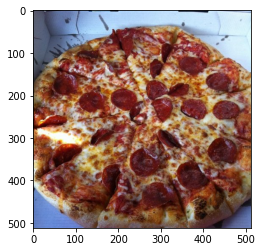

In [ ]:
ti=mpimg.imread('/content/drive/MyDrive/pizza_steak/test/pizza/1001116.jpg')
plt.imshow(ti)

In [ ]:
def view_ra_image(target_dir,target_class):
  target_folder= target_dir + target_class
  random_image=random.sample(os.listdir(target_folder),1)
  img=mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  return img


array([[[107,  60,  16],
        [103,  59,  14],
        [102,  58,  13],
        ...,
        [130,  81,  40],
        [123,  74,  33],
        [107,  58,  17]],

       [[109,  62,  18],
        [106,  62,  17],
        [103,  59,  14],
        ...,
        [123,  74,  33],
        [123,  74,  33],
        [123,  74,  33]],

       [[108,  61,  17],
        [106,  62,  17],
        [106,  62,  17],
        ...,
        [116,  67,  26],
        [119,  70,  29],
        [125,  76,  35]],

       ...,

       [[ 54,  44,  34],
        [ 61,  51,  41],
        [ 69,  59,  50],
        ...,
        [ 97,  51,  17],
        [ 98,  52,  16],
        [ 94,  48,  12]],

       [[ 62,  52,  42],
        [ 60,  50,  40],
        [ 60,  50,  40],
        ...,
        [ 94,  48,  14],
        [ 99,  53,  19],
        [ 90,  44,  10]],

       [[ 59,  49,  39],
        [ 59,  49,  39],
        [ 63,  53,  43],
        ...,
        [ 80,  34,   0],
        [ 88,  42,   8],
        [106,  60,  26]]

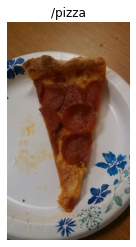

In [ ]:
view_ra_image(target_dir='/content/drive/MyDrive/pizza_steak/train',
              target_class='/pizza')

In [ ]:
import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_dir='/content/drive/MyDrive/pizza_steak/train'
test_dir= '/content/drive/MyDrive/pizza_steak/test'

In [ ]:
train_data=train_gen.flow_from_directory(directory=train_dir,batch_size=32,
                                         class_mode='binary',
                                         target_size=(224,224),
                                         seed=42)

test_data= test_gen.flow_from_directory(directory=test_dir,batch_size=32,
                                         class_mode='binary',
                                         target_size=(224,224),
                                         seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(filters=32, kernel_size= 3 , activation='relu',
                 input_shape = (224,224,3))),
model.add(MaxPool2D(pool_size=2, padding= 'valid')),
model.add(Conv2D(filters=25, kernel_size= 3 , activation='relu'))
model.add(MaxPool2D(pool_size=2, padding= 'valid'))
model.add(Conv2D(filters=10, kernel_size= 3 , activation='relu'))
model.add(MaxPool2D(pool_size=2, padding= 'valid'))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_data,epochs=10)

Epoch 1/10


KeyboardInterrupt: ignored

In [ ]:
model.evaluate(test_data)

16/16 [==============================] - 109s 7s/step - loss: 0.3924 - accuracy: 0.8180


[0.3924459218978882, 0.8180000185966492]

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 25)      7225      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 25)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 10)        2260      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 26, 26, 10)      

In [ ]:
images, labels = train_data.next()
len(images)

32

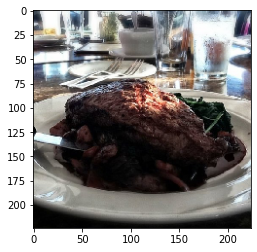

In [ ]:
plt.imshow(images[0])

Testing Model on a Custom image

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2022-05-06 23:25:01--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2022-05-06 23:25:01 (43.7 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



In [ ]:
op=tf.io.read_file('03-pizza-dad.jpeg')
op=tf.image.decode_image(op)
op=tf.image.resize(op, size=[224,224])
op=op/255

In [ ]:
model.predict(tf.expand_dims(op,axis=0))

array([[0.37500626]], dtype=float32)

In [ ]:
image, lael =test_data.next()
len(lael)

32

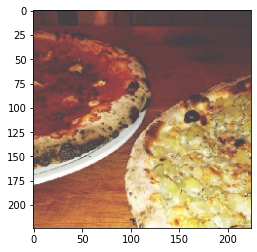

In [ ]:
plt.imshow(image[0])


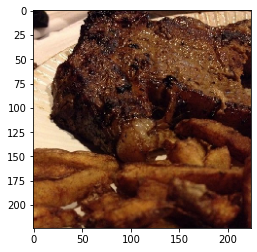

In [ ]:
plt.imshow(image[3])